In [0]:
import numpy as np

### Generate Data
Create a function that randomly gives either +1 or -1 as input

In [0]:
def create_u():
  """
  Inputs:
    None
  Outputs:
    u: +1 or -1 randomly generated
  """
  # YOUR CODE HERE
  x=[-1,1]
  i=np.random.randint(low=0,high=2)
  u=x[i]
  return u

#### Desired data
$y(t+1) = w_0y(t) + w_1y(t-1) + w_2u(t) $

In [0]:
"""Test for create_u"""
u = create_u()
assert u==1 or u== -1


In [0]:
def generate_data(timesteps, w0, w1, w2):
  """
  Inputs:
    timesteps: int, number of timesteps of data
  Outputs:
    u: numpy array with each element +1 or -1 of shape (timesteps, )
    yd: numpy array with each element computed using above equation of shape (timesteps, )
  """
  # YOUR CODE HERE
  u=[]
  for i in range(timesteps):
    u.append(create_u())
  u=np.array(u)
#   u=[1,1,-1,-1,-1,1]
  y=[0]
  for i in range(timesteps):
    if i==0:
      y.append(w0*y[-1]+w1*0+w2*u[i])
    else:
      y.append(w0*y[i]+w1*y[i-1]+w2*u[i])
  yd=np.array(y)[1:]
  return u, yd


In [230]:
### Generate u, yd
u, yd = generate_data(10000, 1.1, -0.3, 0.5)
# u, yd = generate_data(2000, 1.1, -0.3, 0.5)
# u, yd = generate_data(6, 1, 0.5, 1)
u,yd

(array([-1, -1,  1, ..., -1, -1,  1]),
 array([-0.5       , -1.05      , -0.505     , ..., -1.30502399,
        -1.69901603, -0.97741044]))

### Write expression for $y(t+1)$

In [0]:
def get_y_tplus1(w, yt, ytminus1, u):
  """
  Inputs:
    w: numpy array of weights of shape (3, )
    yt: float, y value at time t
    ytminus1: float, y value at time t - 1
    u: input at time t
  Outputs:
    y_tplus1: float, y at t+1
  """
  # YOUR CODE HERE
  y_tplus1=w[0]*yt+w[1]*ytminus1+w[2]*u
  return y_tplus1

In [232]:
get_y_tplus1([1.1,-0.3,0.5],-0.05,-0.5,-1)

-0.405

### Forward propagation of weights
$$
\frac{\partial y(t+1)}{\partial w_0} = w_0\frac{\partial y(t)}{\partial w_0} + y(t) + w_1\frac{\partial y(t-1)}{\partial w_0}
$$
<br><br>
$$
\frac{\partial y(t+1)}{\partial w_1} = w_0\frac{\partial y(t)}{\partial w_1} + y(t-1) + w_1\frac{\partial y(t-1)}{\partial w_1} \\
$$
<br><br>
$$
\frac{\partial y(t+1)}{\partial w_2} = w_0\frac{\partial y(t)}{\partial w_2} +  w_1\frac{\partial y(t-1)}{\partial w_2} + u(t) 
$$
<br><br>
pwj1 is a matrix $\frac{\partial y(t)}{\partial w} =
[\frac{\partial y(t)}{\partial w_0}, \frac{\partial y(t)}{\partial w_1}, \frac{\partial y(t)}{\partial w_2}]$
<br><br>
pwj0 is a matrix $\frac{\partial y(t-1)}{\partial w} =
[\frac{\partial y(t-1)}{\partial w_0}, \frac{\partial y(t-1)}{\partial w_1}, \frac{\partial y(t-1)}{\partial w_2}]$
<br><br>
pwj2 is a matrix $\frac{\partial y(t+1)}{\partial w} =
[\frac{\partial y(t+1)}{\partial w_0}, \frac{\partial y(t+1)}{\partial w_1}, \frac{\partial y(t+1)}{\partial w_2}]$

In [0]:
def forward_prop_weights(w, yt, ytminus1, u, pwj1, pwj0):
  """
  Inputs:
    w: numpy array of weights [w0, w1, w2]
    yt: float, y value at time t
    ytminus1: float, y value at time t - 1
    u: input at time t
    pwj1: numpy array of shape (3, ) as described above
    pwj0: numpy array of shape (3, ) as described above
  Outputs:
    pwj2: numpy array of shape (3, ) as described above
  """  
  # YOUR CODE HERE
  pwj2=[]
  pwj2.append(w[0]*pwj1[0] + yt + w[1]*pwj0[0])
  pwj2.append(w[0]*pwj1[1]+ ytminus1 +w[1]*pwj0[1])
  pwj2.append(w[0]*pwj1[2]+ w[1]*pwj0[2] +u)
  return np.array(pwj2)

### Weight update - Gradient descent
$E = \frac{1}{2}(y_d - y)^2$ <br>
$w_{new} = w_{old} - \eta\frac{\partial E}{\partial w} = w_{old} - \eta(y_d - y)\cdot pwj2$ 

In [0]:
def update_w(w, eta, yd, y, pwj2):
  """
  Inputs:
    w: numpy array of weights [w0, w1, w2]
    eta: float, learning rate
    yd: scalar(float), desired value of y at time t+1
    y: scalar(float), predicted value of y at time t+1
    pwj2: numpy array of shape(3,) obtained from forward_prop_weights
  Outputs:
    w_updated: numpy array of shape(3, ), updated weights
  """
  # YOUR CODE HERE
#   print(y)
  w_updated=w+(eta*(yd-y))*pwj2
  return np.array(w_updated)

### Cost function (error)
$E = \frac{1}{2}(y_d - y)^2$ <br>


In [0]:
def err(yd, y):
  """
  Inputs:
    yd: scalar(float), desired value of y at time t+1
    y: scalar(float), predicted value of y at time t+1
  Outputs:
    E: scalar(float), error as described above 
  """
  # YOUR CODE HERE
  E=0.5*((yd-y)**2)
  return E

### Apply RTRL

In [0]:
def RTRL(yd, eta, timesteps):
  """
  Inputs:
    yd: numpy array of shape(timesteps,) 
    eta: scalar(float), learning rate
    timesteps: int, number of timesteps
  Outputs:
    west: numpy array of shape(timesteps,3), keeps track of all the updated weights over time
    error: numpy array of shape(timesteps,), keeps track of error (as obtained from function err()) over time
  """
  # YOUR CODE HERE
  west=[]
  error=[]
  yt=0
  ytminus1=0
  pwj0=[0,0,0]
  pwj1=[0,0,0]
  w=[0,0,0]
#   pwj1=forward_prop_weights(w, yt, ytminus1, u[0], pwj1, pwj0)
  for i in range(timesteps):
    y_tplus1 = get_y_tplus1(w, yt, ytminus1, u[i])
    pwj2=forward_prop_weights(w, yt, ytminus1, u[i], pwj1, pwj0)
    pwj0=pwj1
    pwj1=pwj2
#     print(ytminus1)
    
#     print(w)
#     print(yt)
    w = update_w(w, eta, yd[i], y_tplus1, pwj2)
    west.append(w)
    error.append(err(yd[i], yt))
    ytminus1=yt
#     print(y_tplus1)
    yt=y_tplus1
  return np.array(west),np.array(error)
   

In [0]:
# error

In [0]:
def plot_w(west):
  plt.plot(west[:,0])
  plt.show()
  plt.plot(west[:,1])
  plt.show()
  plt.plot(west[:,2])
  plt.show()

In [0]:
def plot_err(error):
  plt.plot(error)
  plt.show()

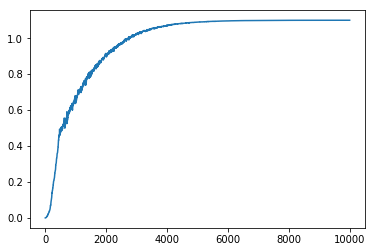

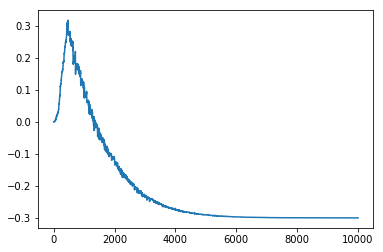

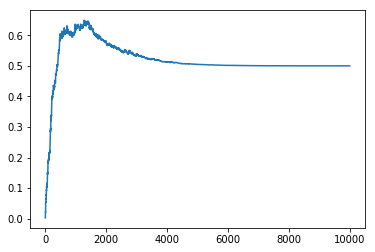

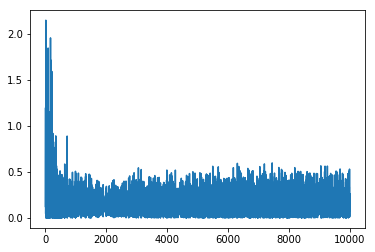

In [240]:
import numpy as np
import matplotlib.pyplot as plt

eta = 0.005
iterations = 10000
# iterations=100

west, error = RTRL(yd, eta, iterations)

plot_w(west)
plot_err(error)